In [70]:
# Zadanie 2

# Dla wybranego zbioru danych przetestować różne algorytmy do link prediction:
# - załadować graf,
# - usunąć randomowo kilka krawędzi z grafu G - można skorzystać z funkcji remove_n_random_edges(),
# - użyć wybranych algorytmów do predykcji linków (np. jaccard_coefficient, resource_allocation_index)
#    i obliczyć prawdopodobieństwo wystąpienia w grafie usuniętych krawędzi,
# - porównać rezultaty.
# W sprawozdaniu należy umieścić wyniki oraz próbę wyjaśnienia rozbieżności 
# pomiędzy wynikami pochodzącymi z różnych algorytmów.

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

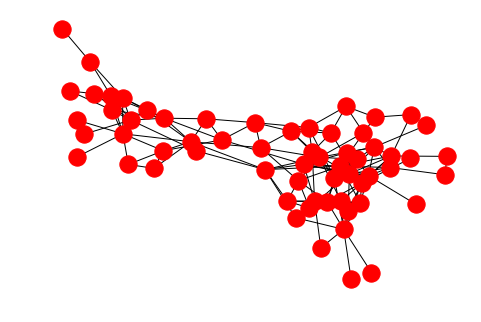

In [72]:
# Wczytywanie grafu z pliku

G = nx.Graph()
edges = nx.read_edgelist('dataset/soc-dolphins/soc-dolphins.mtx')
G.add_edges_from(edges.edges())
nx.draw(G)

In [73]:
import random

removed_edges = []
all_edges = list(G.edges)

In [74]:
def remove_n_random_edges(n):
    for i in range (0,n):
        to_remove = random.randint(0,len(G.edges)-1)
        G.remove_edge(all_edges[to_remove][0],all_edges[to_remove][1])
        removed_edges.append(all_edges[to_remove])
    print("Removed edges: ", removed_edges)
    print("Count of remaining edges: ", len(list(G.edges)))
    
remove_n_random_edges(5)

Removed edges:  [('39', '45'), ('30', '46'), ('39', '44'), ('15', '39'), ('62', '54')]
Count of remaining edges:  154


In [75]:
jaccard = nx.jaccard_coefficient(G, removed_edges)
resource_allocation = nx.resource_allocation_index(G, removed_edges)

print (list(jaccard))
print (list(resource_allocation))

[('39', '45', 0.14285714285714285), ('30', '46', 0.2857142857142857), ('39', '44', 0.1), ('15', '39', 0.23076923076923078), ('62', '54', 0.0)]
[('39', '45', 0.1111111111111111), ('30', '46', 0.5761904761904761), ('39', '44', 0.1), ('15', '39', 0.5166666666666666), ('62', '54', 0)]
